# **FCFNN-based 10-Class Classifier on MNIST Dataset**


Implement and evaluate a **Fully Connected Feedforward Neural Network (FCFNN)** for classifying handwritten digits (0–9) using the MNIST dataset. The network will be trained and tested, and its performance will be documented.

---

In [1]:
#Importing Libraries
from keras.datasets import mnist
from keras.layers import Input, Dense, Flatten
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

2025-09-06 21:44:31.794357: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-06 21:44:32.488647: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-06 21:44:35.260506: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [2]:
# Load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()

In [3]:
#Model Create
inputs = Input((28,28))
x1 = Flatten()(inputs)
x2 = Dense(128, activation='relu')(x1)
x3 = Dense(256, activation='relu')(x2)
x4 = Dense(512, activation='relu')(x3)
x5 = Dense(256, activation='relu')(x4)
x6 = Dense(128, activation='relu')(x5)
outputs = Dense(10, activation='softmax')(x6)
model = Model(inputs, outputs)

E0000 00:00:1757173478.134122   34450 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1757173478.194108   34450 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [9]:
# Train Model

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainX, trainY, validation_split=0.1, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9695 - loss: 0.1236 - val_accuracy: 0.9708 - val_loss: 0.1181
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9767 - loss: 0.0898 - val_accuracy: 0.9762 - val_loss: 0.1121
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9769 - loss: 0.0877 - val_accuracy: 0.9777 - val_loss: 0.0976
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9792 - loss: 0.0819 - val_accuracy: 0.9732 - val_loss: 0.1773
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9805 - loss: 0.0809 - val_accuracy: 0.9713 - val_loss: 0.1190
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9832 - loss: 0.0801 - val_accuracy: 0.9687 - val_loss: 0.1580
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9850 - loss: 0.0634 - val_accuracy: 0.9742 - val_loss: 0.1341
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9844 - loss: 0.0


✅ Test Accuracy: 0.9513


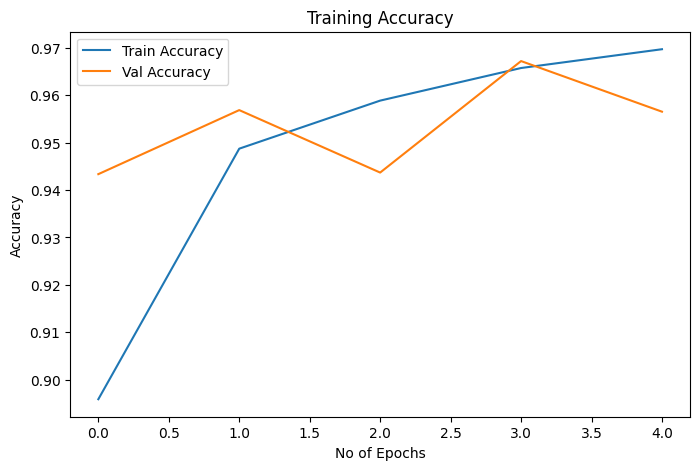

In [8]:

# Evaluate on test set
test_loss, test_acc = model.evaluate(testX, testY, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")


# Plot training history
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.savefig("training_accuracy.png")
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


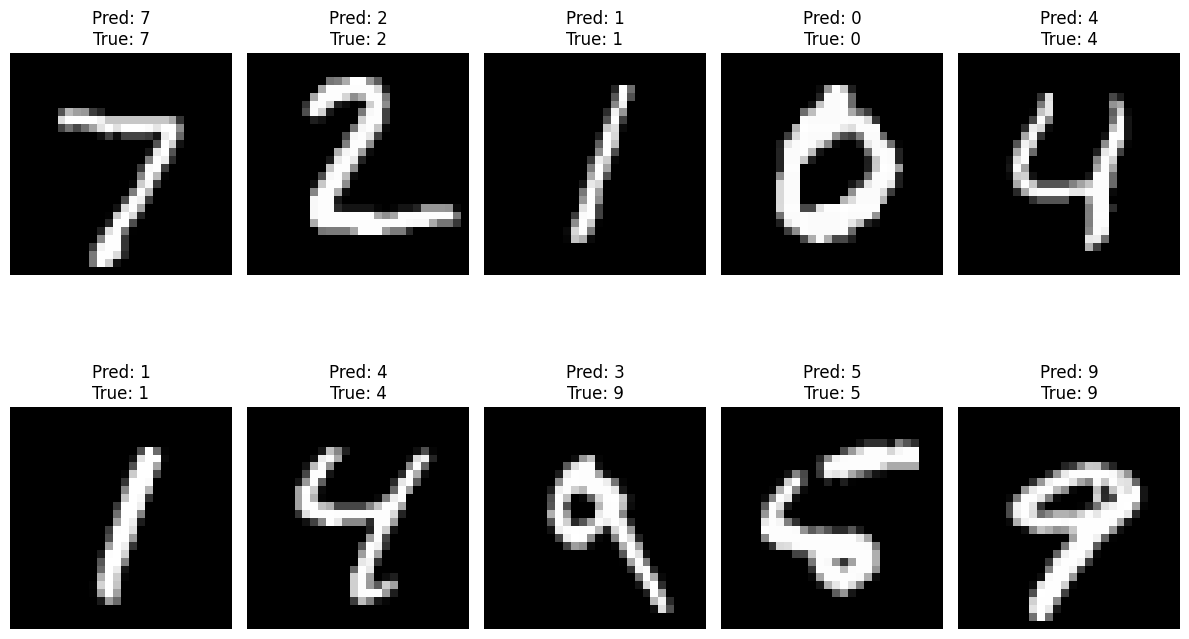

In [7]:
# Predict on test set
predictions = model.predict(testX)
predicted_labels = np.argmax(predictions, axis=1)

# Show 20 test images with predicted labels in a grid
plt.figure(figsize=(12, 8))

for i in range(10):
    plt.subplot(2, 5, i+1)  # 2 rows, 5 columns
    plt.imshow(testX[i], cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {testY[i]}")
    plt.axis('off')

plt.tight_layout()
plt.savefig("test_predictions.png")
plt.show()
